In [2]:
import pandas as pd

data = pd.read_csv('/Users/hazel/Documents/credit_project2/application_train_merge2.csv',index_col=0)
data

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,DAYS_LATE_PAYMENT,NAN,AMT_ARREARS,PC_CNT_INSTALMENT_max,PC_CNT_INSTALMENT_mean,PC_SK_DPDMix_Max,PC_SK_DPDMix_mean,PC_Delay_total,PC_Delay_mean,PC_count
0,100002,1,0,202500.0,1,0.018801,-9461,-637,-3648.0,-2120,...,20.42,0.0,0.00,24.0,24.000000,0.0,0.000000,1.0,1.000000,1.0
1,100003,0,0,270000.0,3,0.003541,-16765,-1188,-1186.0,-291,...,7.45,0.0,0.00,12.0,10.000000,0.0,0.000000,1.0,0.333333,3.0
2,100004,0,0,67500.0,1,0.010032,-19046,-225,-4260.0,-2531,...,7.67,0.0,0.00,4.0,4.000000,0.0,0.000000,0.0,0.000000,1.0
3,100006,0,0,135000.0,1,0.008019,-19005,-3039,-9833.0,-2437,...,25.30,0.0,0.00,48.0,24.000000,0.0,0.000000,1.0,0.333333,3.0
4,100007,0,0,121500.0,1,0.028663,-19932,-3038,-4311.0,-3458,...,4.32,0.0,1.20,24.0,15.200000,0.0,0.000000,2.0,0.400000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,0,157500.0,1,0.032561,-9327,-236,-8456.0,-1982,...,36.29,0.0,0.00,8.0,8.000000,0.0,0.000000,0.0,0.000000,1.0
307507,456252,0,0,72000.0,1,0.025164,-20775,-1213,-4388.0,-4090,...,3.33,0.0,0.00,6.0,6.000000,0.0,0.000000,0.0,0.000000,1.0
307508,456253,0,0,153000.0,3,0.005002,-14966,-7921,-6737.0,-5150,...,13.78,0.0,0.67,12.0,7.333333,5.0,1.666667,0.0,0.000000,3.0
307509,456254,1,0,171000.0,1,0.005313,-11961,-4786,-2562.0,-931,...,18.61,0.0,0.00,16.0,15.000000,0.0,0.000000,2.0,1.000000,2.0


In [3]:
# 有缺失值的欄位
Nan_cols = list(data.loc[:,data.isnull().sum()>0])
data_dropnan = data.drop(columns = Nan_cols)
data_dropnan.shape

(307511, 193)

# Random Forest Feature Importances

In [27]:
# create the classifier with n_estimators = 100

X = data_dropnan.iloc[:, 2:]
y = data_dropnan[['TARGET']]

clf = RandomForestClassifier(n_estimators=100, random_state=0)

# fit the model to the training set

clf.fit(X, y)
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)

pd.set_option("display.max_rows",1000)
pd.set_option("display.max_columns",1000)
feature_scores

/var/folders/dp/hcv7h_qn59b6dcz6l8v_w1z80000gn/T/ipykernel_94050/2794850534.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X, y)


DAYS_BIRTH                                  6.199634e-02
DAYS_ID_PUBLISH                             6.134553e-02
DAYS_REGISTRATION                           6.032479e-02
DAYS_LAST_PHONE_CHANGE                      5.545034e-02
DAYS_EMPLOYED                               5.288836e-02
AMT_INCOME_TOTAL                            4.697666e-02
REGION_POPULATION_RELATIVE                  4.614404e-02
HOUR_APPR_PROCESS_START                     4.139022e-02
AMT_REQ_CREDIT_BUREAU_YEAR                  3.097508e-02
OBS_60_CNT_SOCIAL_CIRCLE                    2.277027e-02
OBS_30_CNT_SOCIAL_CIRCLE                    2.272976e-02
CNT_FAM_MEMBERS                             1.702343e-02
CNT_CHILDREN                                1.280142e-02
AMT_REQ_CREDIT_BUREAU_QRT                   1.121635e-02
NAME_EDUCATION_TYPE                         1.113702e-02
AMT_REQ_CREDIT_BUREAU_MON                   9.968754e-03
FLAG_PHONE                                  9.560327e-03
FLAG_OWN_REALTY_N              

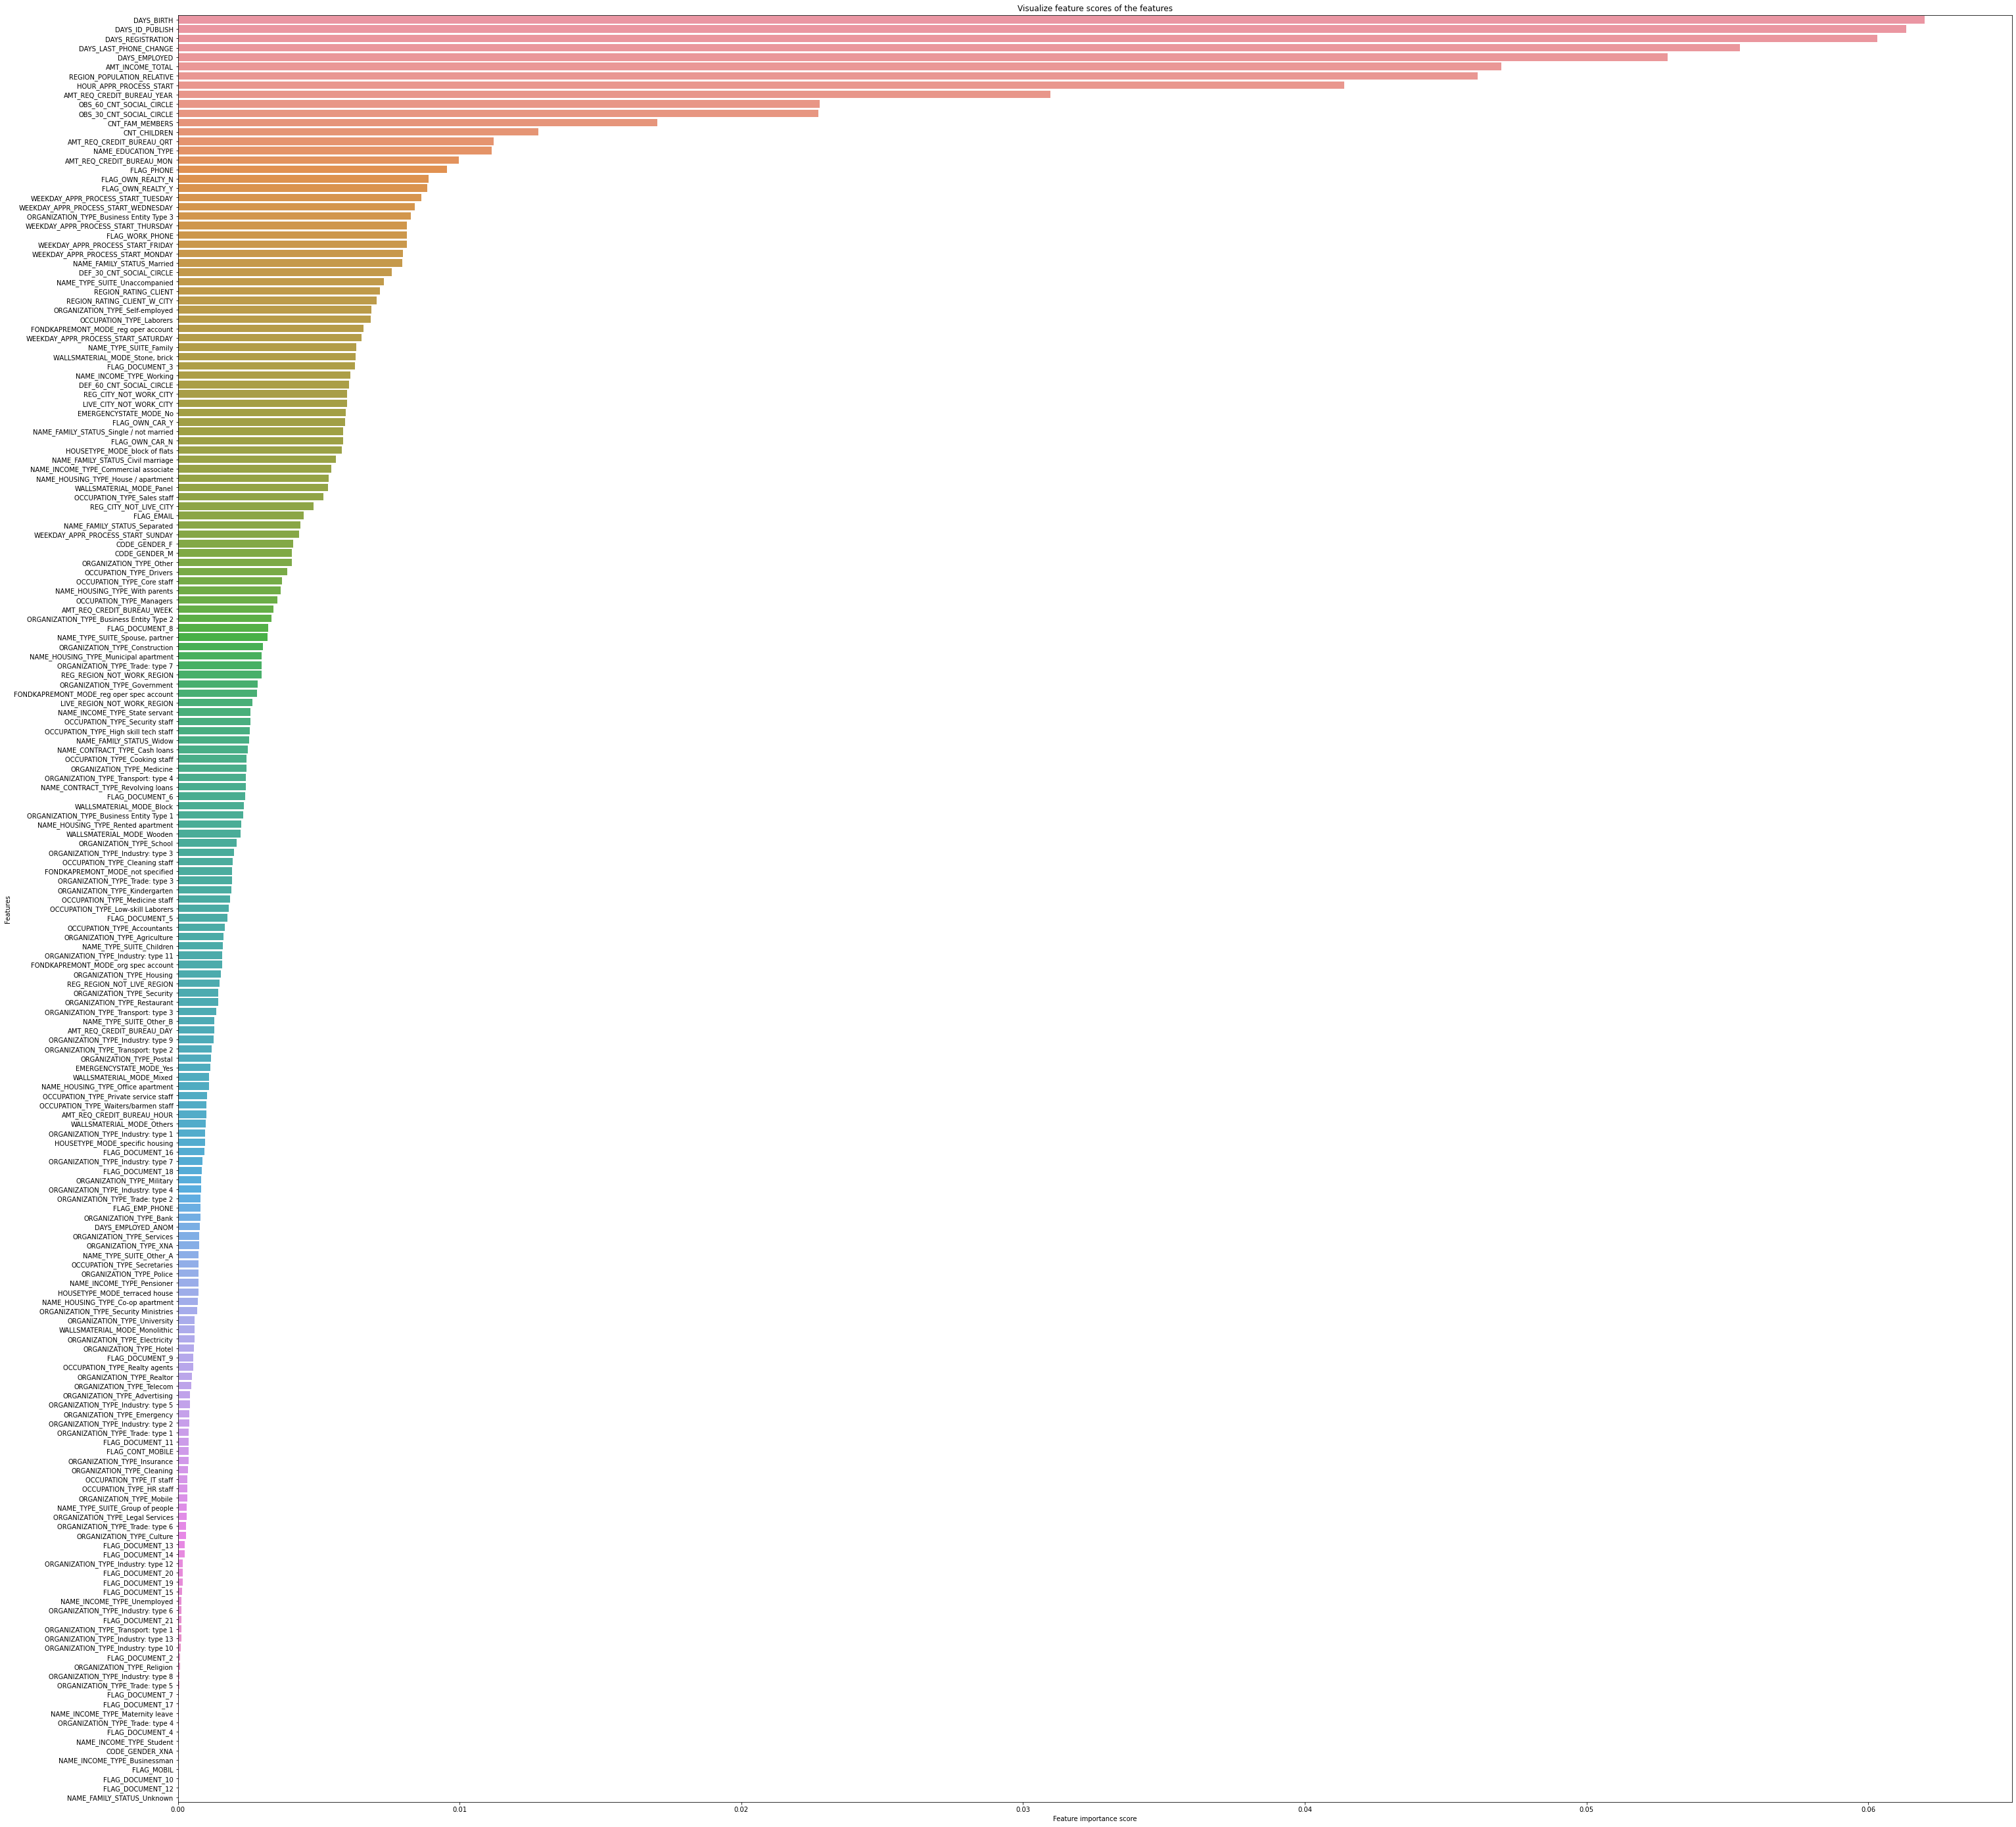

In [34]:
# Creating a seaborn bar plot
import seaborn as sns
f, ax = plt.subplots(figsize=(50, 50))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

# LGB Feature Importances

In [ ]:
import lightgbm as lgb

X = data_dropnan.iloc[:, 2:]
y = data_dropnan[['TARGET']]

lgb_params = {
    'boosting_type':'gbdt',
    'objective':'binary',
    'num_leaves':30,
    'num_round':360,
    'max_depth':8,
    'learning_rate':0.01,
    'feature_fraction':0.5,
    'bagging_fraction':0.8,
    'bagging_freq':12
}
lgb_train = lgb.Dataset(X,y)
model= lgb.train(lgb_params, lgb_train)

plt.figure(figsize=(50,50))
lgb.plot_importance(model, max_num_features=30)
plt.title("Feature Importances")
plt.show()

/Users/hazel/opt/anaconda3/envs/crawler/lib/python3.8/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_round` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
